# Checkpoint Three: Cleaning Data

Now you are ready to clean your data. Before starting coding, provide the link to your dataset below.

My dataset: https://www.kaggle.com/datasets/yasserh/walmart-dataset

Import the necessary libraries and create your dataframe(s).

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

df = pd.read_csv("Walmart.csv")

df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [5]:
# Confirming total rows and columns
df.shape

(6435, 8)

## Missing Data

Test your dataset for missing data and handle it as needed. Make notes in the form of code comments as to your thought process.

In [6]:
# Exploring if any columns have missing values in specific rows

df.isna()

# Seems like every cell have an entry

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
6430,False,False,False,False,False,False,False,False
6431,False,False,False,False,False,False,False,False
6432,False,False,False,False,False,False,False,False
6433,False,False,False,False,False,False,False,False


In [7]:
# Checking to see if there are any nulls

df.info()

# Again looks like every column have entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [8]:
# Trying more coding to detect any missing data
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

## Irregular Data

Detect outliers in your dataset and handle them as needed. Use code comments to make notes about your thought process.

In [9]:
# Summary statistics for certain columns to detect any outliers

columns = [[ 'Weekly_Sales', 'Fuel_Price', 'CPI', 'Unemployment' ]]

for c in columns:
    print(df[c].describe())

# The only column that has outliers is the unemployment column. 
# I am considering keeping the outliers in the data.

       Weekly_Sales   Fuel_Price          CPI  Unemployment
count  6.435000e+03  6435.000000  6435.000000   6435.000000
mean   1.046965e+06     3.358607   171.578394      7.999151
std    5.643666e+05     0.459020    39.356712      1.875885
min    2.099862e+05     2.472000   126.064000      3.879000
25%    5.533501e+05     2.933000   131.735000      6.891000
50%    9.607460e+05     3.445000   182.616521      7.874000
75%    1.420159e+06     3.735000   212.743293      8.622000
max    3.818686e+06     4.468000   227.232807     14.313000


<Axes: >

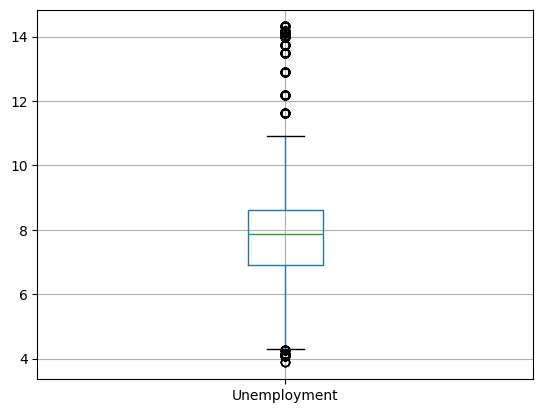

In [10]:
# Visual clearer understanding of Unemployment column statistics
df.boxplot(column=['Unemployment'])

# Based on the graph the 14.313 unemployment rate is not too far off 
#from the data and is not a outlier to be concern about. 

## Unnecessary Data

Look for the different types of unnecessary data in your dataset and address it as needed. Make sure to use code comments to illustrate your thought process.

In [12]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [33]:
# Dropping Temperature and Fuel Price columns because I do not plan on using them to solve y business issue. 

cleaned_df = df.drop(columns=['Temperature', 'Fuel_Price'])
print(cleaned_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   CPI           6435 non-null   float64
 5   Unemployment  6435 non-null   float64
dtypes: float64(3), int64(2), object(1)
memory usage: 301.8+ KB
None


## Inconsistent Data

Check for inconsistent data and address any that arises. As always, use code comments to illustrate your thought process.

In [34]:
cleaned_df.head(100)
# Looking at the first 100 rows, data seems to be consistent throughout

,Store,Date,Weekly_Sales,Holiday_Flag,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,211.096358,8.106
1,1,12-02-2010,1641957.44,1,211.242170,8.106
2,1,19-02-2010,1611968.17,0,211.289143,8.106
3,1,26-02-2010,1409727.59,0,211.319643,8.106
4,1,05-03-2010,1554806.68,0,211.350143,8.106
...,...,...,...,...,...,...
95,1,02-12-2011,1584083.95,0,218.714733,7.866
96,1,09-12-2011,1799682.38,0,218.961846,7.866
97,1,16-12-2011,1881176.67,0,219.179453,7.866
98,1,23-12-2011,2270188.99,0,219.357722,7.866


## Summarize Your Results

Make note of your answers to the following questions.

1. Did you find all four types of dirty data in your dataset?
2. Did the process of cleaning your data give you new insights into your dataset?
3. Is there anything you would like to make note of when it comes to manipulating the data and making visualizations?

In [ ]:
# 1. I did not find all four types of dirty data. I only discovered 2, irregular and unnecessary data.

#2 Yes the outliers I was concerened about from checkpoint 2, is not going to impact my data as much as I thought.

#3 No, there is not.